## Census Data

Data : US Census 2010  [Download from S3](https://s3.amazonaws.com/datashader-data/census2010.parq.zip)  
Data from Census 2020 are not yet available.

Source : 
https://examples.pyviz.org/census/census.html



In [1]:
import datashader as ds, datashader.transfer_functions as tf, numpy as np
from fastparquet import ParquetFile

In [2]:
pf = ParquetFile('data/census2010.parq')

In [3]:
df = pf.to_pandas()
print(len(df))
df.head()

306675004


,easting,northing,race
0,-12418767.0,3697425.00,h
1,-12418512.0,3697143.50,h
2,-12418245.0,3697584.50,h
3,-12417703.0,3697636.75,w
4,-12418120.0,3697129.25,h


----

In [4]:
from functools import partial
from datashader.utils import export_image

from datashader.utils import lnglat_to_meters as webm
USA           = ((-124.72,  -66.95), (23.55, 50.06))
plot_width  = int(900)
plot_height = int(plot_width*7.0/12)

In [11]:
background = "white"
export = partial(export_image, background = background, export_path="export")

In [12]:
cvs = ds.Canvas(plot_width, plot_height, *webm(*USA))
agg = cvs.points(df, 'easting', 'northing')

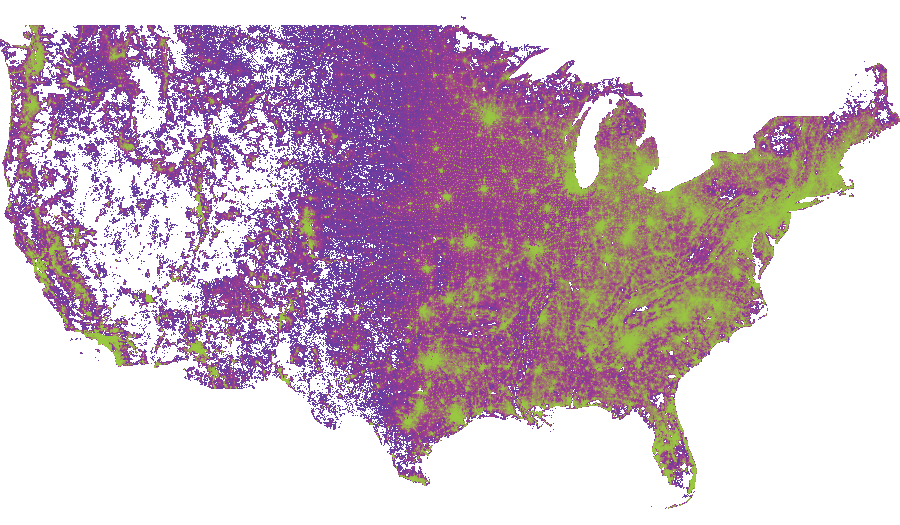

In [13]:
qs_colors = [ "#613EA3","#673EA1","#6D3D9F","#733D9E","#793D9C","#7F3C9A","#863C98","#8C3B96","#923B94","#983B93","#9E3A91","#A43A8F",    
                "#A34788","#A25481","#A1617A","#A06E73","#9F7B6C","#9E8864","#9D955D","#9CA256","#9BAF4F","#9ABC48","#99C941", ]

plot = tf.shade(agg, cmap = qs_colors, how='eq_hist')
plot = tf.set_background(plot, background)
plot

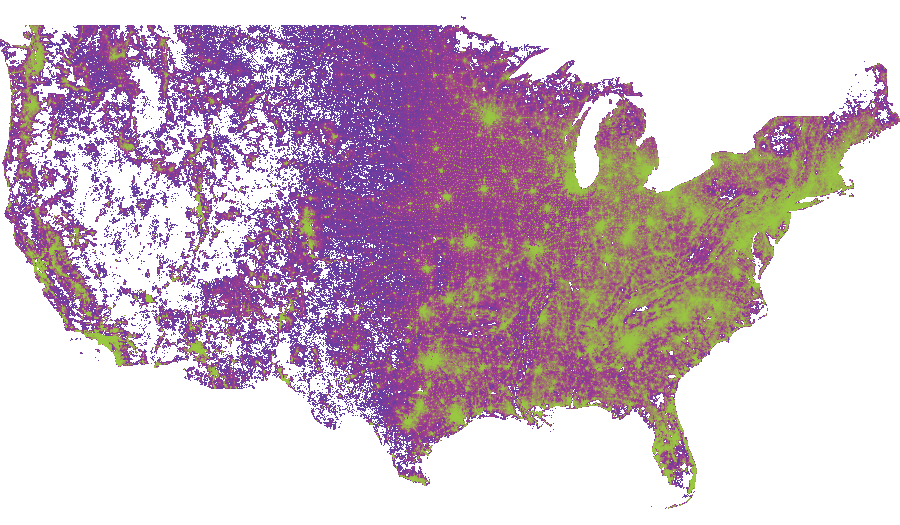

In [14]:
export(plot,"hero_image")